In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

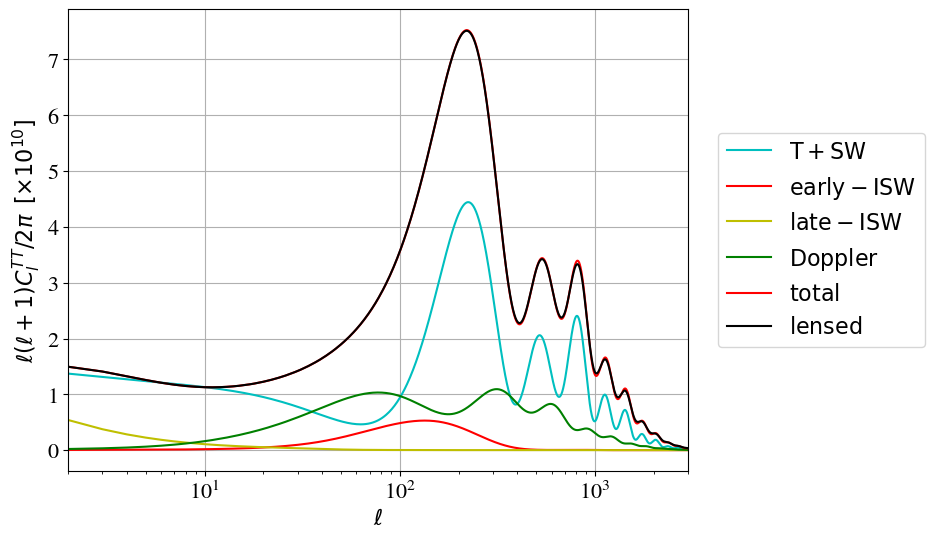

In [3]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'l_max_scalars':5000}
###############
#    
# call CLASS 
#
M = Class()
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.struct_cleanup()  # clean output
M.empty()           # clean input
#
M.set(common_settings) # new input
M.set({'temperature contributions':'tsw'}) 
M.compute()
cl_tsw = M.raw_cl(3000) 
M.struct_cleanup()
M.empty()
#
M.set(common_settings)
M.set({'temperature contributions':'eisw'})
M.compute()
cl_eisw = M.raw_cl(3000) 
M.struct_cleanup()
M.empty()
#
M.set(common_settings)
M.set({'temperature contributions':'lisw'})
M.compute()
cl_lisw = M.raw_cl(3000) 
M.struct_cleanup()
M.empty()
#
M.set(common_settings)
M.set({'temperature contributions':'dop'})
M.compute()
cl_dop = M.raw_cl(3000) 
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,3000])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
#
ell = cl_tot['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
plt.semilogx(ell,factor*cl_tsw['tt'],'c-',label=r'$\mathrm{T+SW}$')
plt.semilogx(ell,factor*cl_eisw['tt'],'r-',label=r'$\mathrm{early-ISW}$')
plt.semilogx(ell,factor*cl_lisw['tt'],'y-',label=r'$\mathrm{late-ISW}$')
plt.semilogx(ell,factor*cl_dop['tt'],'g-',label=r'$\mathrm{Doppler}$')
plt.semilogx(ell,factor*cl_tot['tt'],'r-',label=r'$\mathrm{total}$')
plt.semilogx(ell,factor*cl_lensed['tt'],'k-',label=r'$\mathrm{lensed}$')
#
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

In [4]:
#plt.savefig('cltt_terms.pdf',bbox_inches='tight')